In [1]:
import tqdm 
import numpy as np
from matplotlib import pyplot as plt

# define starting abilities
N_people = 1000
N_luck = 250
N_unluck = 250
resolution = 0.01

positions = np.random.random((N_people, 2))
properties = np.ones(N_people) * 10

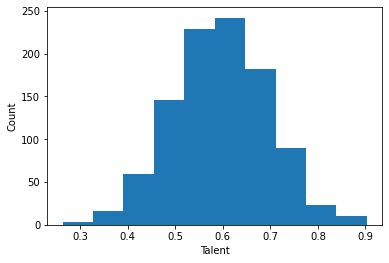

In [2]:
talents = np.random.normal(0.6, 0.1, N_people)
talents[talents>0.99] = 0.99
talents[talents<0.01] = 0.01
plt.hist(talents)
plt.xlabel('Talent')
plt.ylabel('Count')
plt.show()

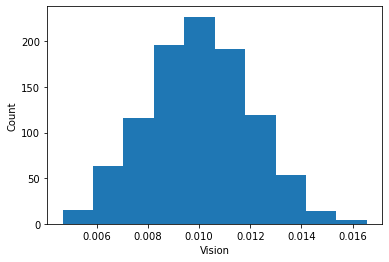

In [3]:
# define vision
visions = np.random.normal(resolution, resolution/5, N_people)
visions[visions<resolution/10] = resolution/10
visions[visions>resolution*2] = resolution*2

plt.hist(visions)
plt.xlabel('Vision')
plt.ylabel('Count')
plt.show()

In [4]:
def AmeetB(A, B, vision=resolution):
    for b in B:
        if np.square(A[0]-b[0]) + np.square(A[1]-b[1]) < np.square(vision):
            return True
    return False

100%|███████████████████████████████████████████| 80/80 [02:38<00:00,  1.98s/it]


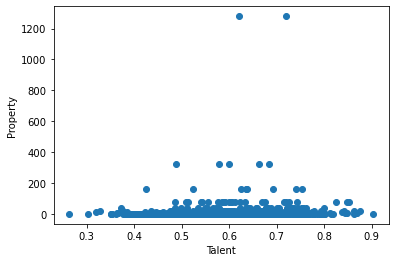

In [5]:
# Exp1: Same vision, different talent

n_iteration = 80
simulated_properties = properties.copy()
for iteration in tqdm.tqdm(range(n_iteration), total = n_iteration):
    meetluck_p = np.random.random(N_people)
    lucks = np.random.random((N_luck, 2))
    unlucks = np.random.random((N_unluck, 2))
    for i, (p, v) in enumerate(zip(positions, visions)):
        if AmeetB(p, unlucks):
            simulated_properties[i] = simulated_properties[i] * 0.5
        elif AmeetB(p, lucks) and meetluck_p[i] < talents[i]:
            simulated_properties[i] = simulated_properties[i] * 2
    
plt.scatter(talents, simulated_properties)
plt.xlabel('Talent')
plt.ylabel('Property')
plt.show()

100%|███████████████████████████████████████████| 80/80 [02:42<00:00,  2.03s/it]


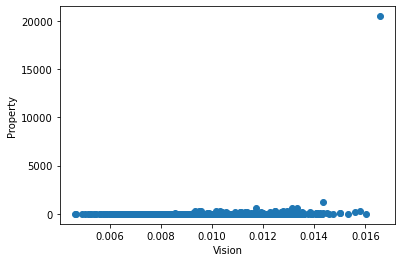

In [6]:
# Exp2: Same talent, different vision

n_iteration = 80
simulated_properties = properties.copy()
for iteration in tqdm.tqdm(range(n_iteration), total = n_iteration):
    meetluck_p = np.random.random(N_people)
    lucks = np.random.random((N_luck, 2))
    unlucks = np.random.random((N_unluck, 2))
    for i, (p, v) in enumerate(zip(positions, visions)):
        if AmeetB(p, unlucks):
            simulated_properties[i] = simulated_properties[i] * 0.5
        elif AmeetB(p, lucks, v) and meetluck_p[i] < 0.6:
            simulated_properties[i] = simulated_properties[i] * 2
    
plt.scatter(visions, simulated_properties)
plt.xlabel('Vision')
plt.ylabel('Property')
plt.show()

100%|███████████████████████████████████████████| 80/80 [02:42<00:00,  2.03s/it]


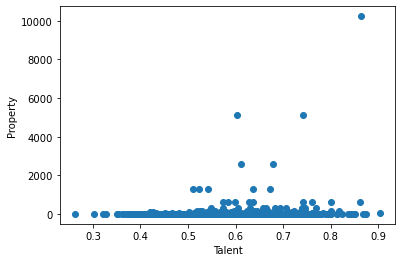

In [7]:
# Exp3: different talent, different vision

n_iteration = 80
simulated_properties = properties.copy()
for iteration in tqdm.tqdm(range(n_iteration), total = n_iteration):
    meetluck_p = np.random.random(N_people)
    lucks = np.random.random((N_luck, 2))
    unlucks = np.random.random((N_unluck, 2))
    for i, (p, v) in enumerate(zip(positions, visions)):
        if AmeetB(p, unlucks):
            simulated_properties[i] = simulated_properties[i] * 0.5
        elif AmeetB(p, lucks, v) and meetluck_p[i] < talents[i]:
            simulated_properties[i] = simulated_properties[i] * 2
    
plt.scatter(talents, simulated_properties)
plt.xlabel('Talent')
plt.ylabel('Property')
plt.show()

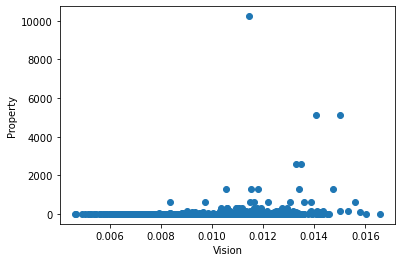

In [8]:
plt.scatter(visions, simulated_properties)
plt.xlabel('Vision')
plt.ylabel('Property')
plt.show()

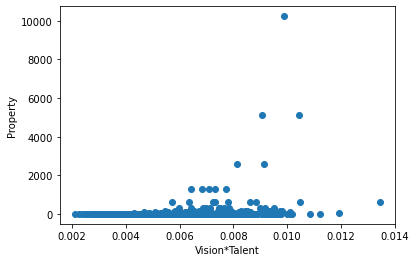

In [9]:
plt.scatter(visions*talents, simulated_properties)
plt.xlabel('Vision*Talent')
plt.ylabel('Property')
plt.show()